In [2]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
cielo = Image.open('cielo.jpg')
cieloA = np.array(cielo)
cieloM = np.reshape(cieloA,(-1,3))

In [4]:
pasto = Image.open('pasto.jpg')
pastoA = np.array(pasto)
pastoM = np.reshape(pastoA,(-1,3))

In [5]:
vaca = Image.open('vaca.jpg')
vacaA = np.array(vaca)
vacaM = np.reshape(vacaA,(-1,3))

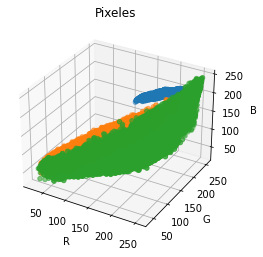

In [6]:
from mpl_toolkits.mplot3d import Axes3D
# Scatter

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot( 111, projection='3d')
#ax1 = Axes3D(fig)

# Definimos los datos de prueba
x = cieloM[:,0]
y = cieloM[:,1]
z = cieloM[:,2]
# Datos adicionales
x2 = pastoM[:,0]
y2 = pastoM[:,1]
z2 = pastoM[:,2]
# Datos adicionales
x3 = vacaM[:,0]
y3 = vacaM[:,1]
z3 = vacaM[:,2]

# Agregamos los puntos en el plano 3D
ax1.scatter3D(x, y, z, marker='o')
ax1.scatter3D(x2, y2, z2, marker='o')
ax1.scatter3D(x3, y3, z3, marker='o')

ax1.set_title("Pixeles")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

# Mostramos el gráfico
plt.show()

Armar el data set, para la estrategia Uno contra Todos


In [7]:
cieloDF = pd.DataFrame(cieloM,columns=list('rgb'))
cieloDF = cieloDF.assign(Tipo=1)


In [8]:
pastoDF = pd.DataFrame(pastoM,columns=list('rgb'))
pastoDF = pastoDF.assign(Tipo=2)


In [9]:
vacaDF = pd.DataFrame(vacaM,columns=list('rgb'))
vacaDF = vacaDF.assign(Tipo=2)


In [10]:
dataset = cieloDF.append(pastoDF,ignore_index=True)
dataset = dataset.append(vacaDF,ignore_index=True)


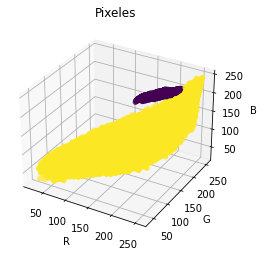

In [11]:
# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot( 111, projection='3d')
#ax1 = Axes3D(fig)

# Definimos los datos de prueba
x = dataset.r
y = dataset.g
z = dataset.b


# Agregamos los puntos en el plano 3D
ax1.scatter3D(x, y, z, c=dataset.Tipo, marker='o')

ax1.set_title("Pixeles")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

# Mostramos el gráfico
plt.show()

In [12]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [13]:

color = dataset.drop(columns = 'Tipo')
tipo = dataset['Tipo']

color_train, color_test, tipo_train, tipo_test = train_test_split(
                                        color,
                                        tipo,
                                        train_size   = 0.2,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [14]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(color_train, tipo_train)

SVC(C=100, kernel='linear', random_state=123)

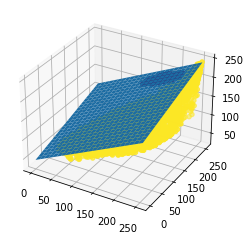

In [15]:
z = lambda x,y: (-modelo.intercept_[0]-modelo.coef_[0][0]*x -modelo.coef_[0][1]*y) / modelo.coef_[0][2]

tmp = np.linspace(0,255,25)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(color_train.r, color_train.g, color_train.b,c=tipo_train)

ax.plot_surface(x, y, z(x,y))
#ax.view_init(30, 60)
plt.show()

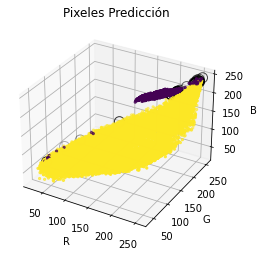

In [16]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#from mlxtend.plotting import plot_decision_regionsfrom mpl_toolkits.mplot3d import Axes3D
# Scatter

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d



# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
#x = np.linspace(np.min(color_train.r), np.max(color_train.r), 10,dtype = "int")
#y = np.linspace(np.min(color_train.g), np.max(color_train.g), 10,dtype = "int")
#z = np.linspace(np.min(color_train.b), np.max(color_train.b), 10,dtype = "int")
#Y, X, Z = np.meshgrid(y, x, z)
#grid = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T


#grid = np.vstack([color_test.r.ravel(),color_test.g.ravel(),color_test.b.ravel()]).T

# Predicción valores grid
#pred_grid = modelo.predict(grid)
pred_grid = modelo.predict(color_test)
# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot( 111, projection='3d')
#ax1 = Axes3D(fig)

# Definimos los datos de prueba
x = color_test.r
y = color_test.g
z = color_test.b


# Agregamos los puntos en el plano 3D
ax1.scatter3D(x, y, z, c=pred_grid, marker='.')
#ax1.scatter3D(x2, y2, z2, c=tipo_train, marker='p')

ax1.set_title("Pixeles Predicción")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

# Vectores soporte
ax1.scatter3D(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    modelo.support_vectors_[:, 2],
    s=100, linewidth=1,
    facecolors='none', edgecolors='black'
)

#Hiperplano

# Mostramos el gráfico
plt.show()



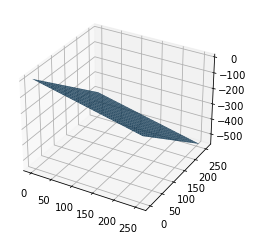

In [17]:
x,y=np.linspace(0,255,25),np.linspace(0,255,25)
X,Y=np.meshgrid(x,y)
Z=(27-3*X-8*Y)/5
fig3 = plt.figure()
ax3 = fig3.add_subplot(111,projection='3d')
ax3.plot_surface(X,Y,Z)



In [18]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(color_test)
predicciones

array([2, 2, 1, ..., 2, 2, 2])

In [19]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = tipo_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy} %")


El accuracy de test es: 99.94830049631524 %


In [20]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    tipo_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,1,2
Real,,
1,28337,5
2,50,77992
